# Deep Learning project - IPSI3

In [1]:
# CONSTANTS

DATA_DIR = 'data/flowers/'
TRAIN_DIR = DATA_DIR + 'train'
TEST_DIR = DATA_DIR + 'test'

In [18]:
# IMPORTS

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

## Data import and augmentation

In [8]:
BATCH_SIZE = 16
datagenerator = ImageDataGenerator(rescale=1./255)

train_generator = datagenerator.flow_from_directory(TRAIN_DIR,
                                          target_size=(128, 128),
                                          class_mode='categorical',
                                          batch_size=BATCH_SIZE,
                                          shuffle='true',
                                          color_mode='rgb')

test_generator = datagenerator.flow_from_directory(TEST_DIR,
                                          target_size=(128, 128),
                                          class_mode='categorical',
                                          color_mode='rgb'
                                          )

Found 600 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


## Model creation and training : iteration #1

In [ ]:
model = Sequential()
model.add(Conv2D(4,(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(len(train_generator.class_indices), activation="softmax"))
opt = SGD(learning_rate=1.0)

EPOCHS = 10
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(train_generator, validation_data = test_generator, epochs=EPOCHS)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.0795 - loss: 3.1241 - val_accuracy: 0.1000 - val_loss: 2.3082
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.0800 - loss: 2.3160 - val_accuracy: 0.1000 - val_loss: 2.3092
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.0996 - loss: 2.3278 - val_accuracy: 0.1000 - val_loss: 2.3126
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.0688 - loss: 6.8732 - val_accuracy: 0.1000 - val_loss: 2.3080
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.0940 - loss: 2.3116 - val_accuracy: 0.1000 - val_loss: 2.3119
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.0889 - loss: 2.3179 - val_accuracy: 0.1000 - val_loss: 2.3091
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.0903 - loss: 2.3223 - val_accuracy: 0.1000 - val_loss: 2.3083
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.0841 - loss: 2.3198 - val_accuracy: 0.

# Model creation and training : iteration #2, learning rate adaptation

- First we decrease the learning rate to 0.01 

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.2185 - loss: 2.3344 - val_accuracy: 0.2400 - val_loss: 2.0275
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.4099 - loss: 1.6507 - val_accuracy: 0.3350 - val_loss: 1.8482
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.5264 - loss: 1.3617 - val_accuracy: 0.4150 - val_loss: 1.7845
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.6400 - loss: 1.0996 - val_accuracy: 0.3200 - val_loss: 1.8549
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.7668 - loss: 0.8473 - val_accuracy: 0.3400 - val_loss: 1.8733
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.7688 - loss: 0.7049 - val_accuracy: 0.4100 - val_loss: 1.7317
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.8557 - loss: 0.5411 - val_accuracy: 0.3800 - val_loss: 1.7609
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.9272 - loss: 0.3915 - val_accuracy: 0.

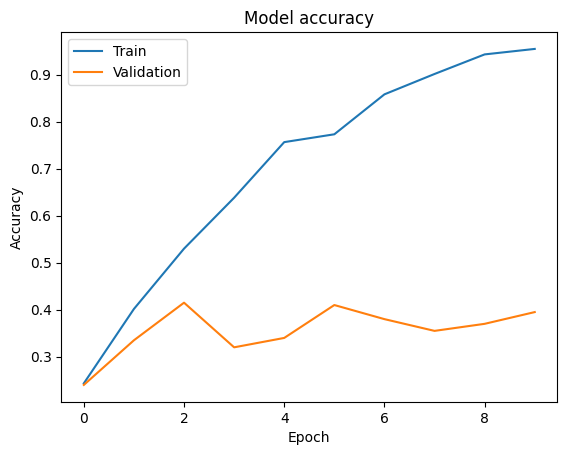

In [14]:
model = Sequential()
model.add(Conv2D(4,(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(len(train_generator.class_indices), activation="softmax"))
opt = SGD(learning_rate=0.01)

EPOCHS = 10
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(train_generator, validation_data = test_generator, epochs=EPOCHS)

# Plot training & validation accuracy values
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

- The curve drawn indicates crearly that the model overfits the training data, resulting in a large gap between the training and validation accuracy curves. 
- Let's add some layers to the model to increase its complexity and see if we can reduce the gap between the training and validation accuracy curves.
    - 

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 227ms/step - accuracy: 0.1505 - loss: 2.3045 - val_accuracy: 0.2350 - val_loss: 2.1776
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 205ms/step - accuracy: 0.3351 - loss: 1.9845 - val_accuracy: 0.2100 - val_loss: 1.9930
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 207ms/step - accuracy: 0.3855 - loss: 1.6339 - val_accuracy: 0.2300 - val_loss: 1.9443
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 206ms/step - accuracy: 0.5525 - loss: 1.3765 - val_accuracy: 0.4100 - val_loss: 1.7422
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 209ms/step - accuracy: 0.5753 - loss: 1.2441 - val_accuracy: 0.4300 - val_loss: 1.6560
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 207ms/step - accuracy: 0.6287 - loss: 1.0226 - val_accuracy: 0.4050 - val_loss: 1.5339
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 223ms/step - accuracy: 0.6827 - loss: 0.9376 - val_accuracy: 0.3950 - val_loss: 1.7026
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 211ms/step - accuracy: 0.7352 - loss: 0.7866 - val_accuracy: 0

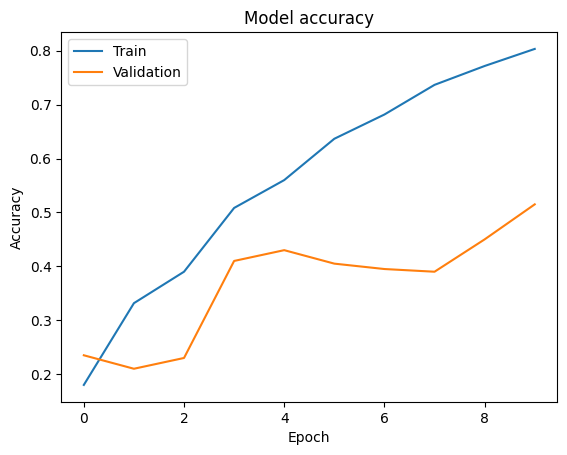

In [19]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(train_generator.class_indices), activation="softmax"))
opt = SGD(learning_rate=0.01)

EPOCHS = 10
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(train_generator, validation_data = test_generator, epochs=EPOCHS)

# Plot training & validation accuracy values
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()